In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

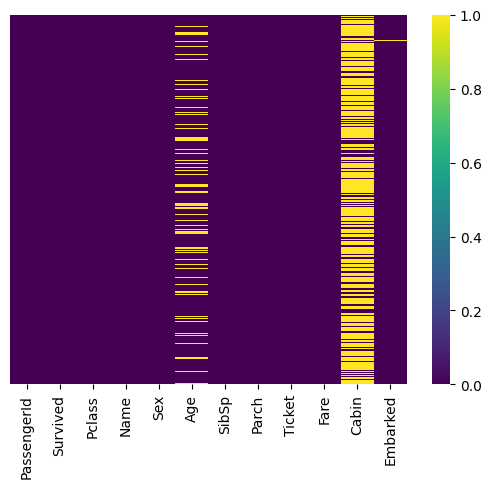

In [5]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

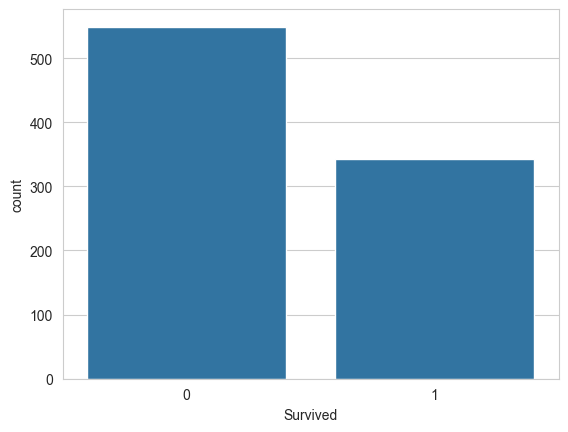

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df)

<Axes: xlabel='Survived', ylabel='count'>

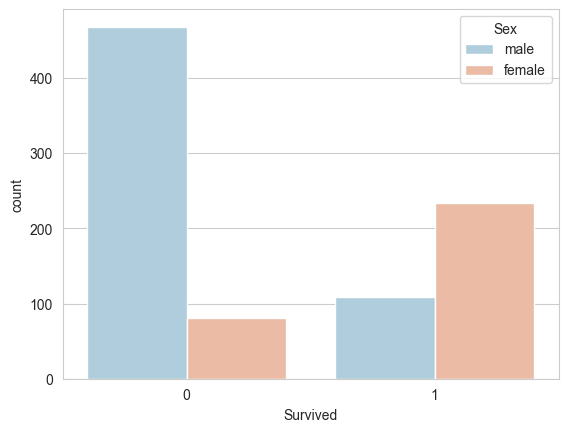

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

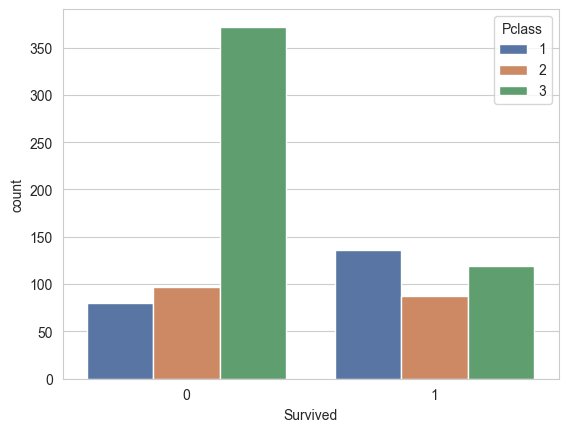

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df, hue = 'Pclass', palette = 'deep')

In [9]:
### Histogram age distribution 

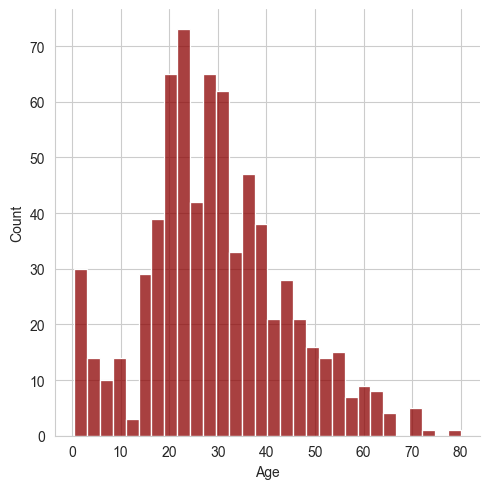

In [10]:
sns.displot(df['Age'].dropna(),color = 'darkred', bins = 30)

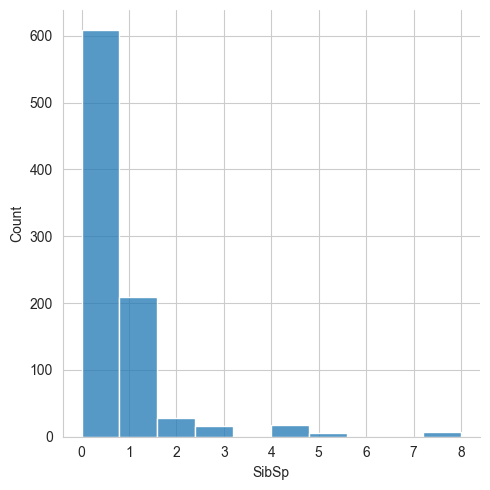

In [11]:
sns.displot(df['SibSp'], kde = False, bins = 10)

<Axes: xlabel='SibSp', ylabel='count'>

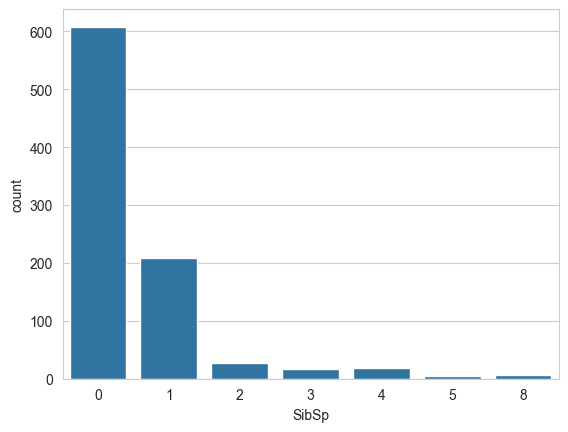

In [12]:
sns.countplot(x='SibSp', data = df)

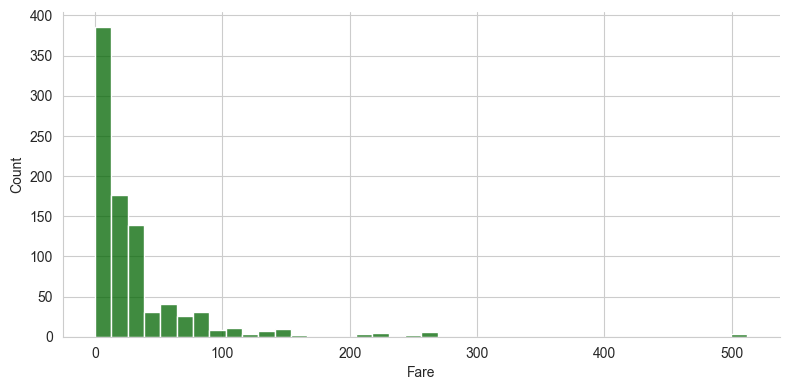

In [13]:
sns.displot(df['Fare'], bins = 40, height = 4, aspect = 2 , color = 'darkgreen' )

<Axes: >

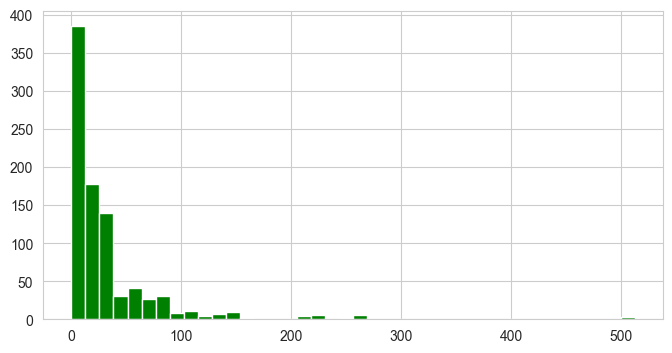

In [14]:
df['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

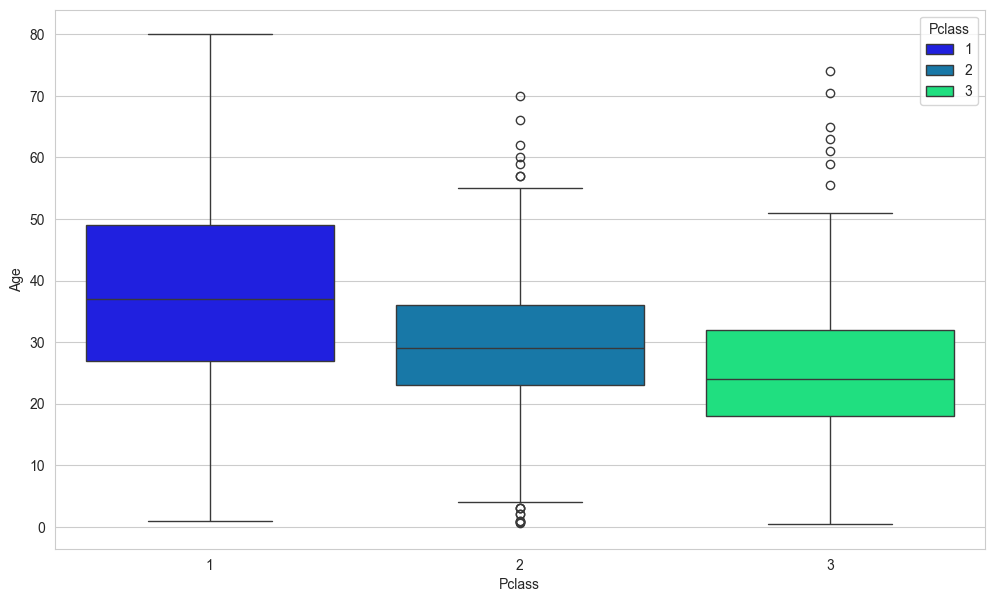

In [15]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter', hue = 'Pclass')

In [16]:
def impute_Col(colns):
    Age = colns[0]
    Pclass = colns[1]
    if (pd.isnull(Age)):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
df['Age'] = df[['Age','Pclass']].apply(impute_Col, axis = 1)

C:\Users\divya\AppData\Local\Temp\ipykernel_1308\3975746173.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = colns[0]
C:\Users\divya\AppData\Local\Temp\ipykernel_1308\3975746173.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = colns[1]


<Axes: >

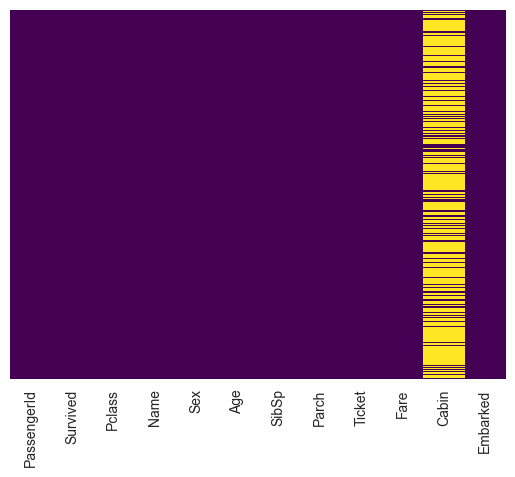

In [18]:
sns.heatmap(df.isnull(), yticklabels = False , cbar = False, cmap = 'viridis')

In [19]:
df.drop('Cabin', axis = 1, inplace = True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
pd.get_dummies(df['Embarked'], drop_first = True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [22]:
pd.get_dummies(df['Sex'], drop_first = True).head()

,male
0,True
1,False
2,False
3,False
4,True


In [23]:
encoded_embarked = pd.get_dummies(df['Embarked'], drop_first=True)
encoded_embarked.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
